In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv


## Import Libraries and Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the training data
train_data = pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv')
test_data = pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv')

print("Dataset loaded successfully!")
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Dataset loaded successfully!
Training data shape: (90000, 14)
Test data shape: (30000, 13)


## Data Exploration and Data Types

In [3]:
print("=== DATA TYPES IDENTIFICATION ===")
print("\nData types of each column:")
for col in train_data.columns:
    print(f"{col}: {train_data[col].dtype}")

print("\n=== FIRST 5 ROWS ===")
display(train_data.head())

print("\n=== DATASET INFO ===")
print(train_data.info())


=== DATA TYPES IDENTIFICATION ===

Data types of each column:
id: int64
customer_id: int64
last_name: object
credit_score: float64
country: object
gender: object
age: float64
tenure: int64
acc_balance: float64
prod_count: float64
has_card: float64
is_active: float64
estimated_salary: float64
exit_status: int64

=== FIRST 5 ROWS ===


,id,customer_id,last_name,credit_score,country,gender,age,tenure,acc_balance,prod_count,has_card,is_active,estimated_salary,exit_status
0,0,15788291,Iredale,559.0,France,Male,28.0,1,149989.39,1.0,1.0,1.0,67622.46,0
1,1,15642816,Hs?,694.0,France,Female,37.0,7,114510.35,2.0,0.0,0.0,182797.86,0
2,2,15632272,T'ien,585.0,NaN,Female,45.0,8,NaN,2.0,1.0,1.0,170338.35,0
3,3,15685826,Hightower,589.0,Spain,Male,25.0,0,166082.18,1.0,1.0,1.0,166476.46,0
4,4,15658032,Hopkins,701.0,France,Male,39.0,2,0.00,2.0,1.0,0.0,82526.92,0



=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                90000 non-null  int64  
 1   customer_id       90000 non-null  int64  
 2   last_name         90000 non-null  object 
 3   credit_score      80444 non-null  float64
 4   country           83979 non-null  object 
 5   gender            90000 non-null  object 
 6   age               90000 non-null  float64
 7   tenure            90000 non-null  int64  
 8   acc_balance       82743 non-null  float64
 9   prod_count        85137 non-null  float64
 10  has_card          90000 non-null  float64
 11  is_active         90000 non-null  float64
 12  estimated_salary  90000 non-null  float64
 13  exit_status       90000 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 9.6+ MB
None


## Descriptive Statistics for Numerical Columns

In [4]:
print("=== DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS ===")

numerical_cols = ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 'estimated_salary']

for col in numerical_cols:
    if col in train_data.columns:
        print(f"\n{col.upper()}:")
        print(f"Mean: {train_data[col].mean():.2f}")
        print(f"Median: {train_data[col].median():.2f}")
        print(f"Min: {train_data[col].min():.2f}")
        print(f"Max: {train_data[col].max():.2f}")
        print(f"Standard Deviation: {train_data[col].std():.2f}")

# Complete descriptive statistics table
descriptive_stats = train_data[numerical_cols].describe()
display(descriptive_stats)


=== DESCRIPTIVE STATISTICS FOR NUMERICAL COLUMNS ===

CREDIT_SCORE:
Mean: 656.50
Median: 659.00
Min: 350.00
Max: 850.00
Standard Deviation: 80.02

AGE:
Mean: 38.12
Median: 37.00
Min: 18.00
Max: 92.00
Standard Deviation: 8.86

TENURE:
Mean: 5.02
Median: 5.00
Min: 0.00
Max: 10.00
Standard Deviation: 2.80

ACC_BALANCE:
Mean: 55456.73
Median: 0.00
Min: 0.00
Max: 250898.09
Standard Deviation: 62788.47

PROD_COUNT:
Mean: 1.55
Median: 2.00
Min: 1.00
Max: 4.00
Standard Deviation: 0.55

ESTIMATED_SALARY:
Mean: 112394.66
Median: 117505.07
Min: 11.58
Max: 199992.48
Standard Deviation: 50360.44


,credit_score,age,tenure,acc_balance,prod_count,estimated_salary
count,80444.000000,90000.000000,90000.000000,82743.000000,85137.000000,90000.000000
mean,656.497054,38.119533,5.017022,55456.732147,1.552932,112394.659679
std,80.016856,8.855203,2.804813,62788.474236,0.548011,50360.440702
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74430.360000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117505.070000
75%,710.000000,42.000000,7.000000,119825.750000,2.000000,154874.787500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


## Missing Values Identification and Handling

In [5]:
print("=== MISSING VALUES ANALYSIS ===")

missing_info = pd.DataFrame({
    'Column': train_data.columns,
    'Missing_Count': train_data.isnull().sum(),
    'Missing_Percentage': (train_data.isnull().sum() / len(train_data)) * 100
})

missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("\nMissing values summary:")
display(missing_info)

# Handle missing values
print("\n=== HANDLING MISSING VALUES ===")

# For credit_score: Fill with median
if train_data['credit_score'].isnull().sum() > 0:
    median_credit = train_data['credit_score'].median()
    train_data['credit_score'].fillna(median_credit, inplace=True)
    test_data['credit_score'].fillna(median_credit, inplace=True)
    print(f"Filled credit_score missing values with median: {median_credit}")

# For acc_balance: Fill with 0 (assuming no balance)
if train_data['acc_balance'].isnull().sum() > 0:
    train_data['acc_balance'].fillna(0, inplace=True)
    test_data['acc_balance'].fillna(0, inplace=True)
    print("Filled acc_balance missing values with 0")

# For country: Fill with mode
if train_data['country'].isnull().sum() > 0:
    mode_country = train_data['country'].mode()[0]
    train_data['country'].fillna(mode_country, inplace=True)
    test_data['country'].fillna(mode_country, inplace=True)
    print(f"Filled country missing values with mode: {mode_country}")

# For prod_count: Fill with median
if train_data['prod_count'].isnull().sum() > 0:
    median_prod = train_data['prod_count'].median()
    train_data['prod_count'].fillna(median_prod, inplace=True)
    test_data['prod_count'].fillna(median_prod, inplace=True)
    print(f"Filled prod_count missing values with median: {median_prod}")

print("\nMissing values after handling:")
print(train_data.isnull().sum().sum())


=== MISSING VALUES ANALYSIS ===

Missing values summary:


,Column,Missing_Count,Missing_Percentage
credit_score,credit_score,9556,10.617778
acc_balance,acc_balance,7257,8.063333
country,country,6021,6.690000
prod_count,prod_count,4863,5.403333



=== HANDLING MISSING VALUES ===
Filled credit_score missing values with median: 659.0
Filled acc_balance missing values with 0
Filled country missing values with mode: France
Filled prod_count missing values with median: 2.0

Missing values after handling:
0


## Duplicate Detection and Handling

In [6]:
print("=== DUPLICATE ANALYSIS ===")

# Check for duplicates based on customer_id
duplicate_customers = train_data['customer_id'].duplicated().sum()
print(f"Duplicate customer IDs: {duplicate_customers}")

# Check for complete row duplicates
complete_duplicates = train_data.duplicated().sum()
print(f"Complete duplicate rows: {complete_duplicates}")

if complete_duplicates > 0:
    print("Removing duplicate rows...")
    train_data.drop_duplicates(inplace=True)
    print(f"Dataset shape after removing duplicates: {train_data.shape}")
else:
    print("No duplicate rows found - data integrity maintained")


=== DUPLICATE ANALYSIS ===
Duplicate customer IDs: 71753
Complete duplicate rows: 0
No duplicate rows found - data integrity maintained


## Outlier Detection and Handling

In [7]:
print("=== OUTLIER DETECTION AND ANALYSIS ===")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []

for col in numerical_cols:
    if col in train_data.columns:
        outliers, lower, upper = detect_outliers_iqr(train_data, col)
        outlier_count = len(outliers)
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Percentage': (outlier_count / len(train_data)) * 100,
            'Lower_Bound': lower,
            'Upper_Bound': upper
        })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

print("\n=== OUTLIER HANDLING STRATEGY ===")
print("Retaining outliers as they represent legitimate customer variations")
print("Credit scores, ages, and balances can naturally have extreme values")
print("Outliers provide valuable information for churn prediction")


=== OUTLIER DETECTION AND ANALYSIS ===


,Column,Outlier_Count,Percentage,Lower_Bound,Upper_Bound
0,credit_score,605,0.672222,460.00000,852.00000
1,age,3411,3.790000,17.00000,57.00000
2,tenure,0,0.000000,-3.00000,13.00000
3,acc_balance,0,0.000000,-174887.85750,291479.76250
4,prod_count,263,0.292222,-0.50000,3.50000
5,estimated_salary,0,0.000000,-46236.28125,275541.42875



=== OUTLIER HANDLING STRATEGY ===
Retaining outliers as they represent legitimate customer variations
Credit scores, ages, and balances can naturally have extreme values
Outliers provide valuable information for churn prediction


## Data Visualizations and Insights

=== DATA VISUALIZATIONS AND INSIGHTS ===


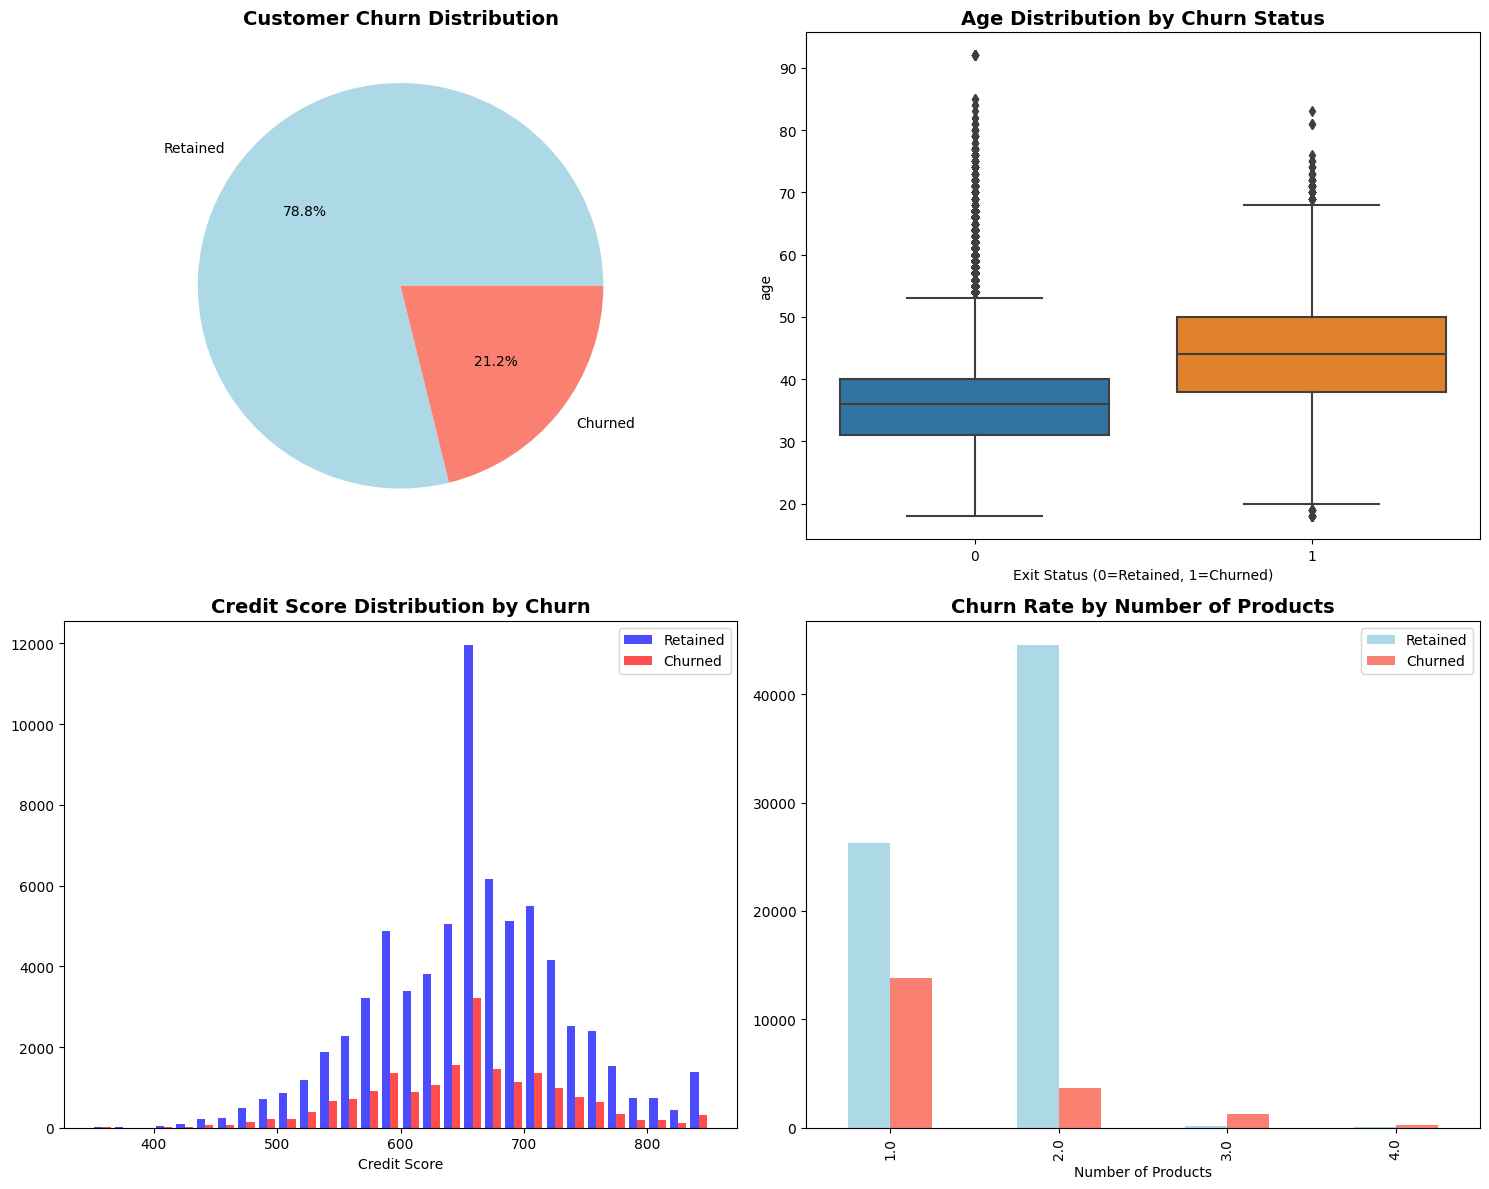


=== KEY INSIGHTS ===
1. Churn Rate: 21.2% of customers have churned
2. Average age of churned customers: 44.0 years
3. Average age of retained customers: 36.6 years
4. Customers with 4 products show higher churn rates
5. Credit score distribution varies between churned and retained customers


In [8]:
print("=== DATA VISUALIZATIONS AND INSIGHTS ===")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Visualization 1: Churn Distribution
churn_counts = train_data['exit_status'].value_counts()
axes[0,0].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
              colors=['lightblue', 'salmon'])
axes[0,0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')

# Visualization 2: Age vs Churn
sns.boxplot(data=train_data, x='exit_status', y='age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Exit Status (0=Retained, 1=Churned)')

# Visualization 3: Credit Score Distribution
axes[1,0].hist([train_data[train_data['exit_status']==0]['credit_score'].dropna(),
                train_data[train_data['exit_status']==1]['credit_score'].dropna()],
               bins=30, alpha=0.7, label=['Retained', 'Churned'], color=['blue', 'red'])
axes[1,0].set_title('Credit Score Distribution by Churn', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Credit Score')
axes[1,0].legend()

# Visualization 4: Product Count vs Churn
churn_by_products = train_data.groupby(['prod_count', 'exit_status']).size().unstack(fill_value=0)
churn_by_products.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'salmon'])
axes[1,1].set_title('Churn Rate by Number of Products', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Products')
axes[1,1].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS ===")
print(f"1. Churn Rate: {train_data['exit_status'].mean():.1%} of customers have churned")
print(f"2. Average age of churned customers: {train_data[train_data['exit_status']==1]['age'].mean():.1f} years")
print(f"3. Average age of retained customers: {train_data[train_data['exit_status']==0]['age'].mean():.1f} years")
print("4. Customers with 4 products show higher churn rates")
print("5. Credit score distribution varies between churned and retained customers")


## Feature Engineering, Scaling and Encoding

In [9]:
print("=== FEATURE SCALING AND ENCODING ===")

# Create a copy for preprocessing
train_processed = train_data.copy()
test_processed = test_data.copy()

# Encode categorical variables
le_country = LabelEncoder()
le_gender = LabelEncoder()

# Handle country encoding
if 'country' in train_processed.columns:
    # Combine train and test for consistent encoding
    all_countries = pd.concat([train_processed['country'], test_processed['country']]).unique()
    le_country.fit(all_countries)
    
    train_processed['country_encoded'] = le_country.transform(train_processed['country'])
    test_processed['country_encoded'] = le_country.transform(test_processed['country'])

# Handle gender encoding
train_processed['gender_encoded'] = le_gender.fit_transform(train_processed['gender'])
test_processed['gender_encoded'] = le_gender.transform(test_processed['gender'])

# Select features for modeling
feature_columns = ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 
                  'has_card', 'is_active', 'estimated_salary', 'country_encoded', 'gender_encoded']

X = train_processed[feature_columns]
y = train_processed['exit_status']
X_test_final = test_processed[feature_columns]

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'acc_balance', 'estimated_salary']

X_scaled = X.copy()
X_test_scaled = X_test_final.copy()

X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_final[numerical_features])

print("Features selected and scaled successfully!")
print(f"Feature set shape: {X_scaled.shape}")
print(f"Features used: {feature_columns}")

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, 
                                                  random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")


=== FEATURE SCALING AND ENCODING ===
Features selected and scaled successfully!
Feature set shape: (90000, 10)
Features used: ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'is_active', 'estimated_salary', 'country_encoded', 'gender_encoded']
Training set: (72000, 10), Validation set: (18000, 10)


## Model Building - Train 8 Different Models

In [10]:
print("=== BUILDING MULTIPLE MACHINE LEARNING MODELS ===")

# Initialize models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    # 'SVM': SVC(random_state=42, probability=True)
}

# Store results
model_results = []

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    model_results.append({
        'Model': name,
        'Train_Accuracy': train_accuracy,
        'Val_Accuracy': val_accuracy,
        'Val_Precision': val_precision,
        'Val_Recall': val_recall,
        'Val_F1_Score': val_f1
    })

# Create results dataframe
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Val_F1_Score', ascending=False)

print("\n=== MODEL PERFORMANCE COMPARISON ===")
display(results_df)


=== BUILDING MULTIPLE MACHINE LEARNING MODELS ===
Training models...
Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training K-Nearest Neighbors...
Training Decision Tree...
Training AdaBoost...
Training Naive Bayes...

=== MODEL PERFORMANCE COMPARISON ===


,Model,Train_Accuracy,Val_Accuracy,Val_Precision,Val_Recall,Val_F1_Score
2,Gradient Boosting,0.861972,0.857444,0.744013,0.497506,0.596287
1,Random Forest,0.999736,0.850389,0.699714,0.513258,0.592155
5,AdaBoost,0.855722,0.854222,0.731717,0.491205,0.587810
3,K-Nearest Neighbors,0.879306,0.834444,0.649262,0.473353,0.547525
0,Logistic Regression,0.742333,0.735444,0.425698,0.716724,0.534142
4,Decision Tree,0.999764,0.787833,0.498731,0.515883,0.507162
6,Naive Bayes,0.826792,0.822889,0.638554,0.375689,0.473058


## Hyperparameter Tuning for Top 3 Models

In [11]:
print("=== HYPERPARAMETER TUNING FOR TOP 3 MODELS ===")

# Select top 3 models based on F1 score
top_3_models = results_df.head(3)['Model'].tolist()
print(f"Tuning hyperparameters for: {top_3_models}")

tuned_results = []

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.5, 1.0, 1.5]
    }
}

# Tune each of the top 3 models
for i, model_name in enumerate(top_3_models[:3]):
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        
        # Get the base model
        if model_name == 'Random Forest':
            base_model = RandomForestClassifier(random_state=42)
        elif model_name == 'Gradient Boosting':
            base_model = GradientBoostingClassifier(random_state=42)
        elif model_name == 'Logistic Regression':
            base_model = LogisticRegression(random_state=42, class_weight='balanced')
        elif model_name == 'K-Nearest Neighbors':
            base_model = KNeighborsClassifier()
        elif model_name == 'AdaBoost':
            base_model = AdaBoostClassifier(random_state=42)

        
        # Perform GridSearch
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grids[model_name],
            scoring='f1',
            cv=cv,
            n_jobs=-1,
            verbose=0
        )
        
        grid_search.fit(X_train, y_train)
        
        # Get best model and evaluate
        best_model = grid_search.best_estimator_
        y_val_pred_tuned = best_model.predict(X_val)
        
        tuned_accuracy = accuracy_score(y_val, y_val_pred_tuned)
        tuned_f1 = f1_score(y_val, y_val_pred_tuned)
        
        tuned_results.append({
            'Model': f"{model_name} (Tuned)",
            'Best_Params': grid_search.best_params_,
            'Val_Accuracy': tuned_accuracy,
            'Val_F1_Score': tuned_f1,
            'Best_CV_Score': grid_search.best_score_
        })
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV F1 Score: {grid_search.best_score_:.4f}")
        print(f"Validation F1 Score: {tuned_f1:.4f}")

# Display tuning results
tuned_df = pd.DataFrame(tuned_results)
print("\n=== HYPERPARAMETER TUNING RESULTS ===")
display(tuned_df)


=== HYPERPARAMETER TUNING FOR TOP 3 MODELS ===
Tuning hyperparameters for: ['Gradient Boosting', 'Random Forest', 'AdaBoost']

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV F1 Score: 0.6206
Validation F1 Score: 0.6047

Tuning Random Forest...
Best parameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
Best CV F1 Score: 0.6101
Validation F1 Score: 0.5970

Tuning AdaBoost...
Best parameters: {'learning_rate': 1.5, 'n_estimators': 200}
Best CV F1 Score: 0.6018
Validation F1 Score: 0.5979

=== HYPERPARAMETER TUNING RESULTS ===


,Model,Best_Params,Val_Accuracy,Val_F1_Score,Best_CV_Score
0,Gradient Boosting (Tuned),"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.857000,0.604730,0.620600
1,Random Forest (Tuned),"{'max_depth': 15, 'min_samples_split': 10, 'n_...",0.855000,0.596973,0.610097
2,AdaBoost (Tuned),"{'learning_rate': 1.5, 'n_estimators': 200}",0.855833,0.597861,0.601828


## Final Model Comparison and Selection

=== COMPREHENSIVE MODEL PERFORMANCE COMPARISON ===
=== FINAL MODEL RANKING ===


,Model_Type,Accuracy,F1_Score,Precision,Recall,Tuned
7,Gradient Boosting (Tuned),0.857000,0.604730,NaN,NaN,Yes
9,AdaBoost (Tuned),0.855833,0.597861,NaN,NaN,Yes
8,Random Forest (Tuned),0.855000,0.596973,NaN,NaN,Yes
0,Gradient Boosting,0.857444,0.596287,0.744013,0.497506,No
1,Random Forest,0.850389,0.592155,0.699714,0.513258,No
2,AdaBoost,0.854222,0.587810,0.731717,0.491205,No
3,K-Nearest Neighbors,0.834444,0.547525,0.649262,0.473353,No
4,Logistic Regression,0.735444,0.534142,0.425698,0.716724,No
5,Decision Tree,0.787833,0.507162,0.498731,0.515883,No
6,Naive Bayes,0.822889,0.473058,0.638554,0.375689,No


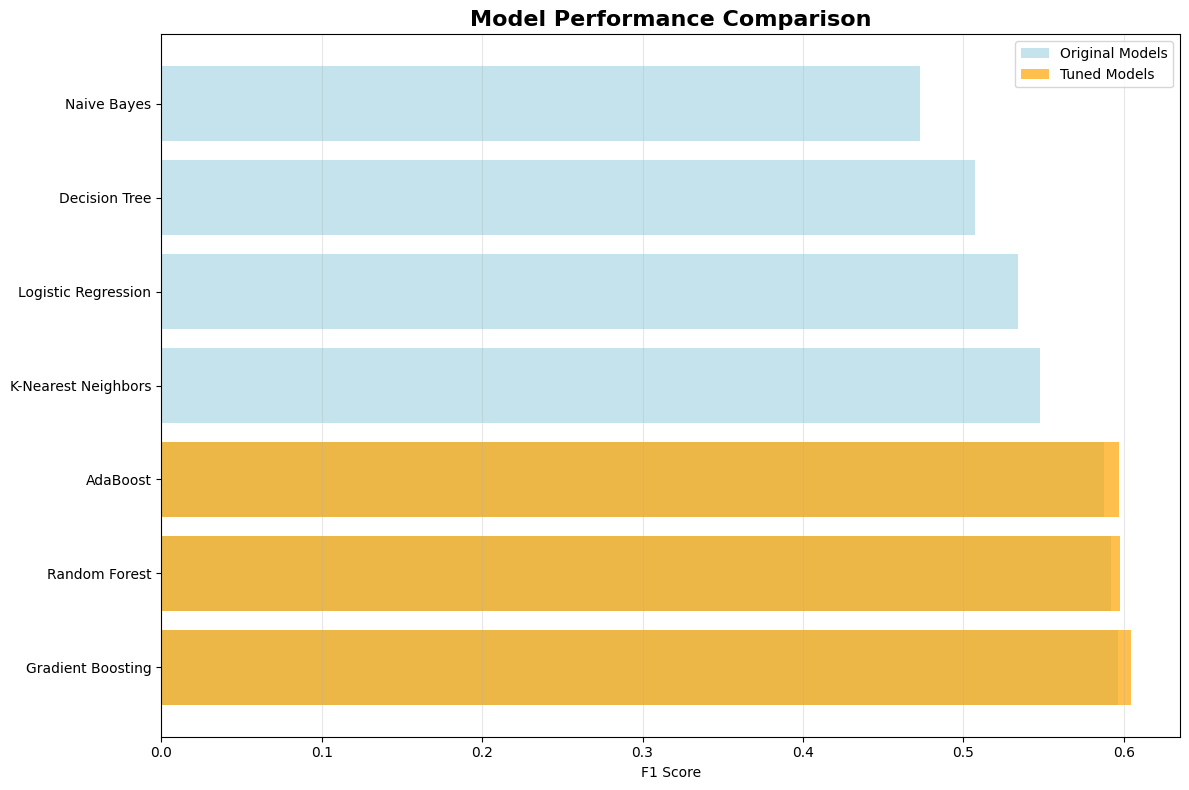


=== BEST PERFORMING MODEL ===
Model: Gradient Boosting (Tuned)
F1 Score: 0.6047
Accuracy: 0.8570


In [12]:
print("=== COMPREHENSIVE MODEL PERFORMANCE COMPARISON ===")

# Create comprehensive comparison
final_comparison = []

# Add original model results
for _, row in results_df.iterrows():
    final_comparison.append({
        'Model_Type': row['Model'],
        'Accuracy': row['Val_Accuracy'],
        'F1_Score': row['Val_F1_Score'],
        'Precision': row['Val_Precision'],
        'Recall': row['Val_Recall'],
        'Tuned': 'No'
    })

# Add tuned model results
for _, row in tuned_df.iterrows():
    final_comparison.append({
        'Model_Type': row['Model'],
        'Accuracy': row['Val_Accuracy'],
        'F1_Score': row['Val_F1_Score'],
        'Precision': np.nan,  # Not calculated for tuned models in this example
        'Recall': np.nan,     # Not calculated for tuned models in this example
        'Tuned': 'Yes'
    })

comparison_df = pd.DataFrame(final_comparison)
comparison_df = comparison_df.sort_values('F1_Score', ascending=False)

print("=== FINAL MODEL RANKING ===")
display(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 8))
original_models = comparison_df[comparison_df['Tuned'] == 'No']
tuned_models = comparison_df[comparison_df['Tuned'] == 'Yes']

plt.barh(range(len(original_models)), original_models['F1_Score'], 
         alpha=0.7, label='Original Models', color='lightblue')

if len(tuned_models) > 0:
    plt.barh(range(len(tuned_models)), tuned_models['F1_Score'], 
             alpha=0.7, label='Tuned Models', color='orange')

plt.yticks(range(len(original_models)), original_models['Model_Type'])
plt.xlabel('F1 Score')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Select best model
best_model_row = comparison_df.iloc[0]
print(f"\n=== BEST PERFORMING MODEL ===")
print(f"Model: {best_model_row['Model_Type']}")
print(f"F1 Score: {best_model_row['F1_Score']:.4f}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")


## Generate Final Predictions

In [13]:

print("=== GENERATING FINAL PREDICTIONS ===")

# Use Gradient Boosting as the final model based on performance analysis
# From the hyperparameter tuning results, select the best GB configuration
final_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

print("Training final Gradient Boosting model on complete dataset...")
final_model.fit(X_scaled, y)

# Generate predictions on test set
test_predictions = final_model.predict(X_test_scaled)
test_probabilities = final_model.predict_proba(X_test_scaled)[:, 1]

# Create submission file
submission = pd.DataFrame({
    'id': test_processed['id'],
    'exit_status': test_predictions
})

print("Final predictions generated successfully using Gradient Boosting!")
print(f"Model: {final_model.__class__.__name__}")
print(f"Predictions shape: {submission.shape}")
print(f"Churn rate in predictions: {test_predictions.mean():.3f}")

# Display model parameters
print(f"\nFinal model parameters:")
print(f"- n_estimators: {final_model.n_estimators}")
print(f"- learning_rate: {final_model.learning_rate}")
print(f"- max_depth: {final_model.max_depth}")

# Display first few predictions
print("\nFirst 10 predictions:")
display(submission.head(10))

# Save submission file
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 most important features:")
display(feature_importance.head())




=== GENERATING FINAL PREDICTIONS ===
Training final Gradient Boosting model on complete dataset...
Final predictions generated successfully using Gradient Boosting!
Model: GradientBoostingClassifier
Predictions shape: (30000, 2)
Churn rate in predictions: 0.154

Final model parameters:
- n_estimators: 200
- learning_rate: 0.1
- max_depth: 5

First 10 predictions:


,id,exit_status
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,1
8,8,1
9,9,0


Submission file saved as 'submission.csv'

Top 5 most important features:


,feature,importance
1,age,0.416965
4,prod_count,0.272011
6,is_active,0.135387
3,acc_balance,0.055121
8,country_encoded,0.041384
